<a href="https://colab.research.google.com/github/yfhkucing/RandomForestBMS/blob/master/model_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_excel('/content/data bms.xlsx',sheet_name='data')

In [13]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 0,Fan 0.33,Fan 0.67,Fan 1,avg_temp,ACH_jendela,ACH_fan,ACH_total
0,0.0,0.0,0.421769,0.076923,0.046875,1.0,0.0,0.0,0.0,0.852012,0.000000,0.0,0.000000
1,0.0,0.0,0.360544,0.057692,0.750000,1.0,0.0,0.0,0.0,0.611178,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.903846,1.000000,1.0,0.0,0.0,0.0,0.238244,0.000000,0.0,0.000000
3,0.0,0.0,0.051020,0.769231,0.109375,1.0,0.0,0.0,0.0,0.349359,0.000000,0.0,0.000000
4,0.0,0.0,1.000000,0.711538,0.609375,1.0,0.0,0.0,0.0,0.285208,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.0,1.0,0.394558,0.153846,0.734375,0.0,0.0,0.0,1.0,0.318158,0.179179,1.0,0.201177
188,1.0,1.0,0.554422,0.000000,0.718750,0.0,0.0,0.0,1.0,0.310295,0.018029,1.0,0.044346
189,1.0,1.0,0.680272,0.038462,0.000000,0.0,0.0,0.0,1.0,0.375923,0.024403,1.0,0.050549
190,1.0,1.0,0.741497,0.173077,0.218750,0.0,0.0,0.0,1.0,0.118479,0.018144,1.0,0.044458


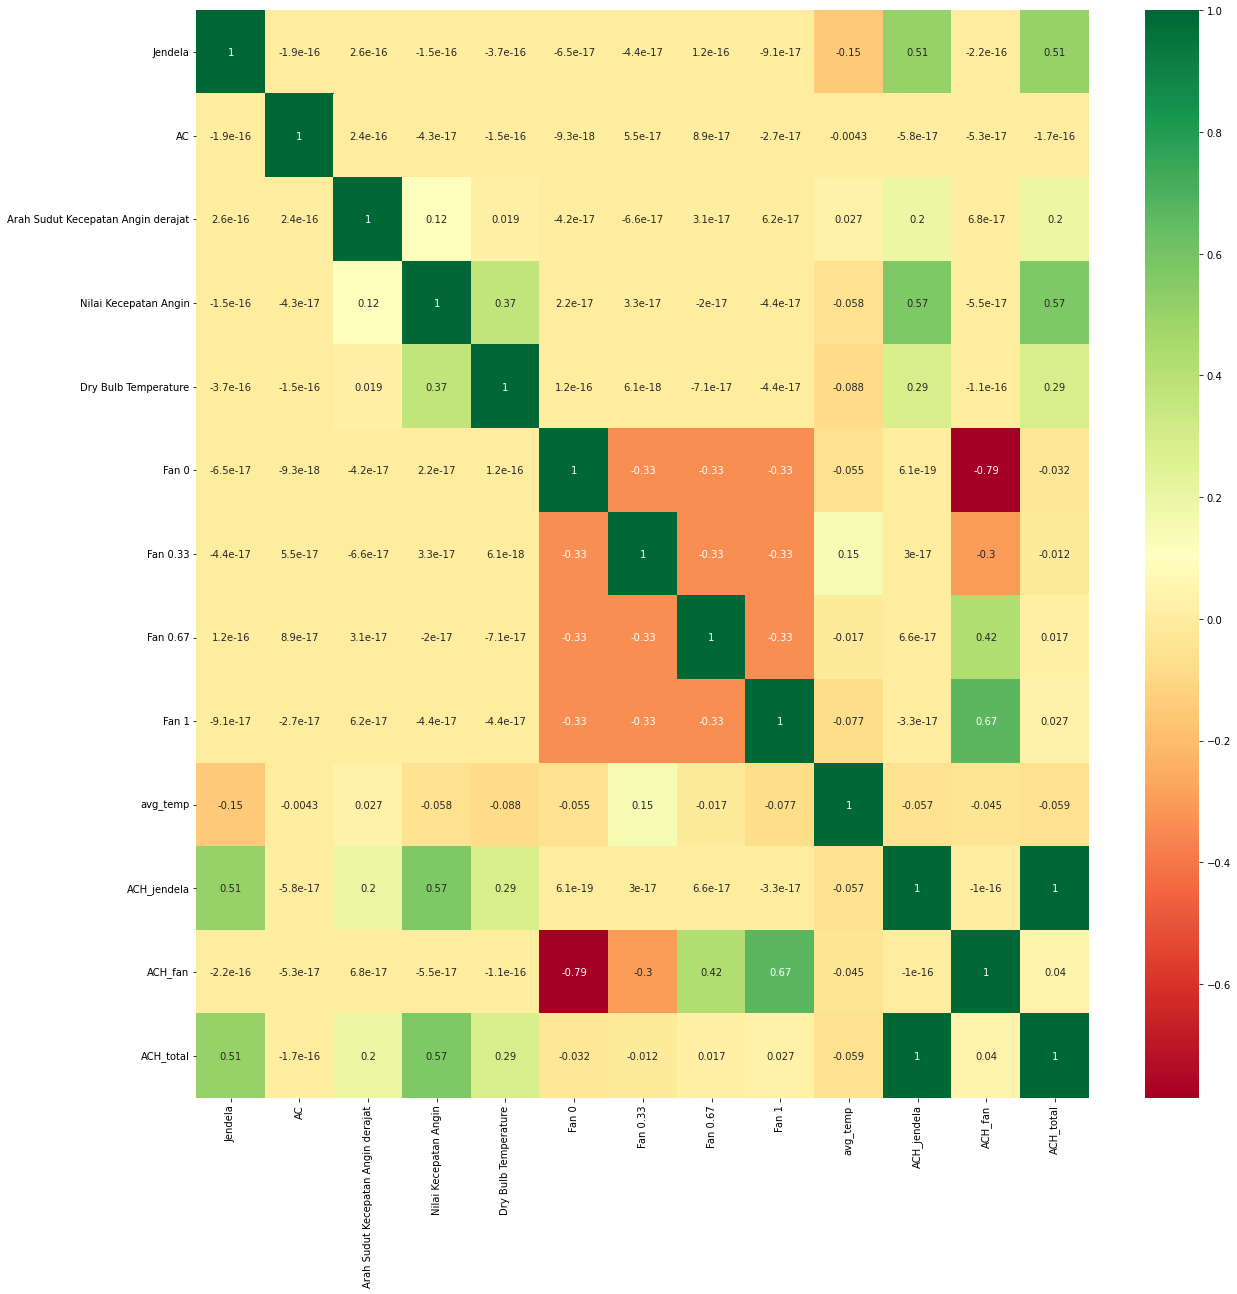

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation

corrmat = normalized_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(normalized_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
#data Xn and Yn

import numpy as np

Xn = normalized_df.drop(['avg_temp','ACH_jendela','ACH_total',], axis=1)
Yn = normalized_df.drop(['Jendela','AC','Arah Sudut Kecepatan Angin derajat','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 0','Fan 0.33','Fan 0.67','Fan 1','ACH_jendela','ACH_fan'], axis=1)

In [16]:
Xn

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 0,Fan 0.33,Fan 0.67,Fan 1,ACH_fan
0,0.0,0.0,0.421769,0.076923,0.046875,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.360544,0.057692,0.750000,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.903846,1.000000,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.051020,0.769231,0.109375,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.000000,0.711538,0.609375,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
187,1.0,1.0,0.394558,0.153846,0.734375,0.0,0.0,0.0,1.0,1.0
188,1.0,1.0,0.554422,0.000000,0.718750,0.0,0.0,0.0,1.0,1.0
189,1.0,1.0,0.680272,0.038462,0.000000,0.0,0.0,0.0,1.0,1.0
190,1.0,1.0,0.741497,0.173077,0.218750,0.0,0.0,0.0,1.0,1.0


In [17]:
Yn

,avg_temp,ACH_total
0,0.852012,0.000000
1,0.611178,0.000000
2,0.238244,0.000000
3,0.349359,0.000000
4,0.285208,0.000000
...,...,...
187,0.318158,0.201177
188,0.310295,0.044346
189,0.375923,0.050549
190,0.118479,0.044458


In [97]:
#split data
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size=0.2, random_state=10)

Xn_train = np.array(Xn_train)
Xn_test = np.array(Xn_test)
Yn_train = np.array(Yn_train)
Yn_test = np.array(Yn_test)

In [98]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [103]:
#10 fitur 2 label
#regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='softmax'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [104]:
model.compile(loss= keras.losses.MeanAbsoluteError(),optimizer='adam',metrics=['accuracy'])

In [105]:
history = model.fit(Xn_train,Yn_train, epochs=100,validation_data=(Xn_test, Yn_test), verbose=2)

Epoch 1/100
5/5 - 1s - loss: 0.3156 - accuracy: 0.7778 - val_loss: 0.3153 - val_accuracy: 0.8462 - 824ms/epoch - 165ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3142 - accuracy: 0.8497 - val_loss: 0.3140 - val_accuracy: 0.8462 - 47ms/epoch - 9ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3129 - accuracy: 0.8497 - val_loss: 0.3126 - val_accuracy: 0.8462 - 48ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.3115 - accuracy: 0.8497 - val_loss: 0.3112 - val_accuracy: 0.8462 - 51ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.3098 - accuracy: 0.8497 - val_loss: 0.3096 - val_accuracy: 0.8462 - 51ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.3081 - accuracy: 0.8497 - val_loss: 0.3076 - val_accuracy: 0.8462 - 47ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.3062 - accuracy: 0.8497 - val_loss: 0.3052 - val_accuracy: 0.8462 - 54ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.3040 - accuracy: 0.8497 - val_loss: 0.3028 - val_accuracy: 0.8462 - 51ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - l

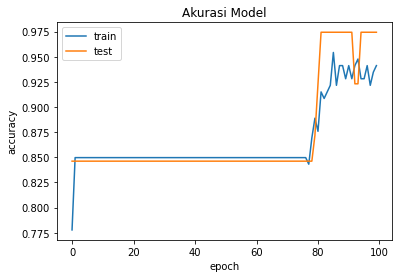

In [106]:
#accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
data = np.array([0.0, 0.0, 0.421769, 0.076923, 0.046875, 1.0, 0.0, 0.0, 0.0, 0.0])
data = data.reshape(-1, 10)
model.predict(data)

array([[0.9569775 , 0.04302254]], dtype=float32)